## Daniel Moreira Soares - ID 1581005
Trabalho de conclusão do módulo de Estatística 1 - ada.tech

# Parte 1: Realizar uma análise descritiva por completo da base (qualitativas e quantitativas);

Usei uma base do Titanic  que achei no Kaggle (bem clichê, eu sei, mas achei interessante). Descobri depois que ela é bem mais SUJA do que a do Seaborn - deu mais trabalho - e inclusive a taxa de sobreviventes é diferente.

Espero ter calculado tudo certo. Efusivo abraço!

In [3]:
#Importanto o pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Importando base de dados
titanic = pd.read_csv(r'C:\Users\Danie\Downloads\train_and_test2.csv') #ADAPTAR PARA A BASE DE DADOS LOCAL

In [5]:
#Visualizar a base
titanic.head(3)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1


## Parte 1 - Análise qualitativa e descritiva

In [6]:
#Formato da base
titanic.shape

(1309, 28)

In [7]:
#Informações da base (tipo de coluna e linhas)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

## Limpando a base
Notei que na base baixada, haviam várias categorias 'lixo' com estrutura 'zero.x'
- Eliminei categorias sem informação relevante.
- Renomeei a coluna '2urvived' para 'Survived'.

In [8]:
#Limpando colunas que tem 'zero' no nome
#Criando uma categoria de colunas_zero com o nome das colunas
colunas_zero = [colunas for colunas in titanic.columns if 'zero' in colunas]
colunas_zero


['zero',
 'zero.1',
 'zero.2',
 'zero.3',
 'zero.4',
 'zero.5',
 'zero.6',
 'zero.7',
 'zero.8',
 'zero.9',
 'zero.10',
 'zero.11',
 'zero.12',
 'zero.13',
 'zero.14',
 'zero.15',
 'zero.16',
 'zero.17',
 'zero.18']

In [9]:
#Eliminando essas colunas do meu dataset
titanic.drop(columns = colunas_zero, inplace=True)


In [10]:
#Renomeando a categoria '2urvived' para 'Survived'
titanic['Survived'] = titanic['2urvived']
titanic.drop(columns = '2urvived', inplace=True)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


### Transformando idade em num

In [12]:
titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')

### Transformando transformando Sex (0,1) em Masculino e Feminino

In [13]:
titanic['Sex'] = titanic['Sex'].replace({0: 'Masculino', 1: 'Feminino'})

## Análise de info das categorias úteis
- Passengerid - número de identificação
- Age - idade
- Fare - tarifa
- Sex - sexo
- sipbs - quantidade de irmãos a bordo
- Parch - quantidade de pais ou filhos a bordo
- Pclass - classe do bilhete
- Embarked - porto de embarque
- Survived - subreviveu?

In [14]:
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,Masculino,1,0,3,2.0,0
1,2,38.0,71.2833,Feminino,1,0,1,0.0,1
2,3,26.0,7.9250,Feminino,0,0,3,2.0,1
3,4,35.0,53.1000,Feminino,1,0,1,2.0,1
4,5,35.0,8.0500,Masculino,0,0,3,2.0,0


In [15]:
#Resumo estatístico
titanic.describe()

,Passengerid,Age,Fare,sibsp,Parch,Pclass,Embarked,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,8.000000,9.000000,3.000000,2.000000,1.000000


In [16]:
#Quantidade de valores únicos nas colunas
titanic.nunique()

Passengerid    1309
Age              98
Fare            281
Sex               2
sibsp             7
Parch             8
Pclass            3
Embarked          3
Survived          2
dtype: int64

In [17]:
#Vendo se existem valores vazios
titanic.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [18]:
#Vendo quais estão vazios
titanic[titanic['Embarked'].isnull()]

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
61,62,38.0,80.0,Feminino,0,0,1,NaN,1
829,830,62.0,80.0,Feminino,0,0,1,NaN,1


In [19]:
#Verificar qual porto é o mais comum (normalizar os dados)
titanic['Embarked'].value_counts()

Embarked
2.0    914
0.0    270
1.0    123
Name: count, dtype: int64

In [20]:
#Substituindo os dados
titanic.loc[titanic['Passengerid'] == 62, 'Embarked'] = '2.0'

C:\Users\Danie\AppData\Local\Temp\ipykernel_70700\77469523.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titanic.loc[titanic['Passengerid'] == 62, 'Embarked'] = '2.0'


In [21]:
titanic.loc[titanic['Passengerid'] == 830, 'Embarked'] = '2.0'

# Parte 2: Levantar 5 questões sobre a base de dados e responder utilizando filtragens, análises estatísticas e gráficos;

## Perguntas levantadas

1. A regra de "mulheres e crianças primeiro" foi realmente seguida?
2. Qual era a distribuição de idade dos passageiros e como ela afetou as chances de vida?
3. O preço da passagem (Fare) tem correlação com a sobrevivência?
4. Viajar sozinho era mais perigoso do que viajar em família?
5. Qual a relação entre a classe da passagem e a sobrevivência?


## 1 - A regra de "mulheres e crianças primeiro" foi realmente seguida?

In [22]:
#Calculando porcentagem de sobreviventes
titanic['Survived'].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Survived
0    73.87 %
1    26.13 %
Name: proportion, dtype: object

In [23]:
# Calculando a taxa de sobrevivência por Sexo
sobrevivencia_por_sexo = titanic.groupby('Sex')['Survived'].mean().mul(100).round(2).astype(str) + ' %'
print(f'Taxa de Sobrevivência:\n{sobrevivencia_por_sexo}')

Taxa de Sobrevivência:
Sex
Feminino      50.0 %
Masculino    12.93 %
Name: Survived, dtype: object


In [24]:
def mulheres_e_criancas(linha):
    #Definir criança
    if linha['Age'] < 12:
        return 'Criança'
    #Definir homem e mulher adulta
    return 'Mulher Adulta' if linha['Sex'] == 'Feminino' else 'Homem Adulto'

#Aplicar uma coluna de categoria para Mulheres_e_Crianças
titanic['Mulheres_e_Crianças'] = titanic.apply(mulheres_e_criancas, axis=1)

In [25]:
titanic['Mulheres_e_Crianças'].head()

0     Homem Adulto
1    Mulher Adulta
2    Mulher Adulta
3    Mulher Adulta
4     Homem Adulto
Name: Mulheres_e_Crianças, dtype: object

In [26]:
#Cruzar mulheres e crianças e sobreviventes
cruzamento = titanic.groupby('Mulheres_e_Crianças')['Survived'].mean().sort_values(ascending=False).mul(100).round(2).astype(str) + ' %'

print('Taxa de Sobrevivência por Grupo:')
print(cruzamento)

Taxa de Sobrevivência por Grupo:
Mulheres_e_Crianças
Mulher Adulta    50.47 %
Criança          42.86 %
Homem Adulto     11.21 %
Name: Survived, dtype: object


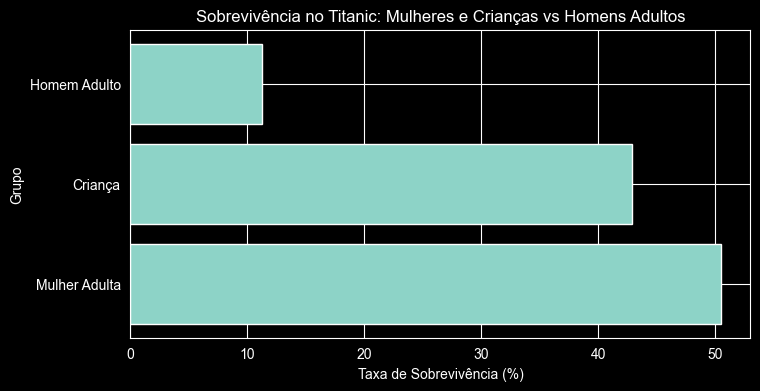

In [27]:
dados_grafico = titanic.groupby('Mulheres_e_Crianças')['Survived'].mean().sort_values(ascending=False) * 100

categorias = dados_grafico.index
valores = dados_grafico.values

fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(categorias, valores)

ax.set_xlabel('Taxa de Sobrevivência (%)')
ax.set_ylabel('Grupo')
ax.set_title('Sobrevivência no Titanic: Mulheres e Crianças vs Homens Adultos')

plt.show()

In [28]:
#RESPOSTA: A regra foi seguida, pois os homens adultos eram a grande maioria, mesmo assim menos de 15% sobreviveu

## 2. Qual era a distribuição de idade dos passageiros e como ela afetou as chances de vida?


### Criar categorias de idades em uma nova coluna de faixa-etária

In [29]:
#Criar categorias de idades
bins = [0, 12, 18, 30, 60, 100]
labels = ['Criança', 'Adolescente', 'Jovens_Adultos', 'Adulto', 'Idoso']

# Criar nova coluna faixa_etaria
titanic['Faixa_Etaria'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)

In [30]:
faixas = titanic['Faixa_Etaria'].value_counts().sort_index()
faixas

Faixa_Etaria
Criança            91
Adolescente        63
Jovens_Adultos    678
Adulto            437
Idoso              40
Name: count, dtype: int64

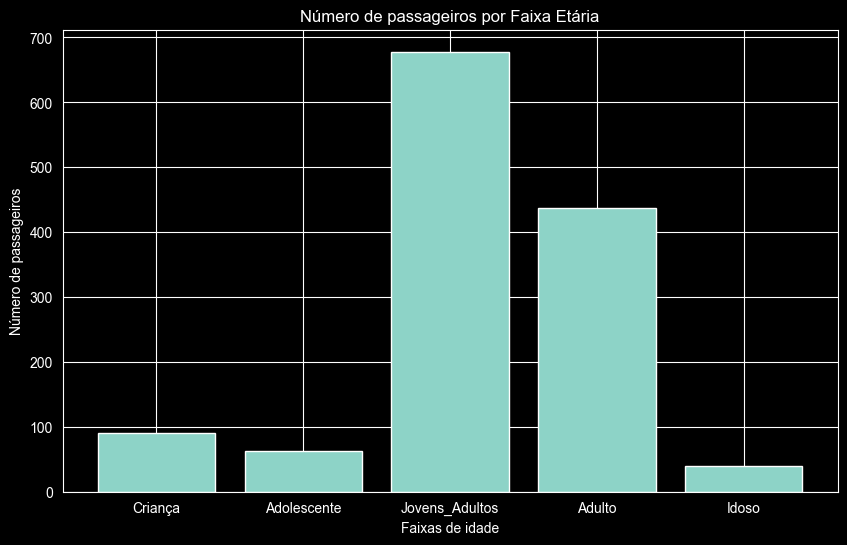

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(faixas.index, faixas.values)

ax.set_title('Número de passageiros por Faixa Etária')
ax.set_xlabel('Faixas de idade')
ax.set_ylabel('Número de passageiros')

plt.show()


In [32]:
print(titanic[['Sex', 'Age', 'Faixa_Etaria']].head())

         Sex   Age    Faixa_Etaria
0  Masculino  22.0  Jovens_Adultos
1   Feminino  38.0          Adulto
2   Feminino  26.0  Jovens_Adultos
3   Feminino  35.0          Adulto
4  Masculino  35.0          Adulto


C:\Users\Danie\AppData\Local\Temp\ipykernel_70700\813381170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cruzamento_idade = titanic.groupby('Faixa_Etaria')['Survived'].mean()*100


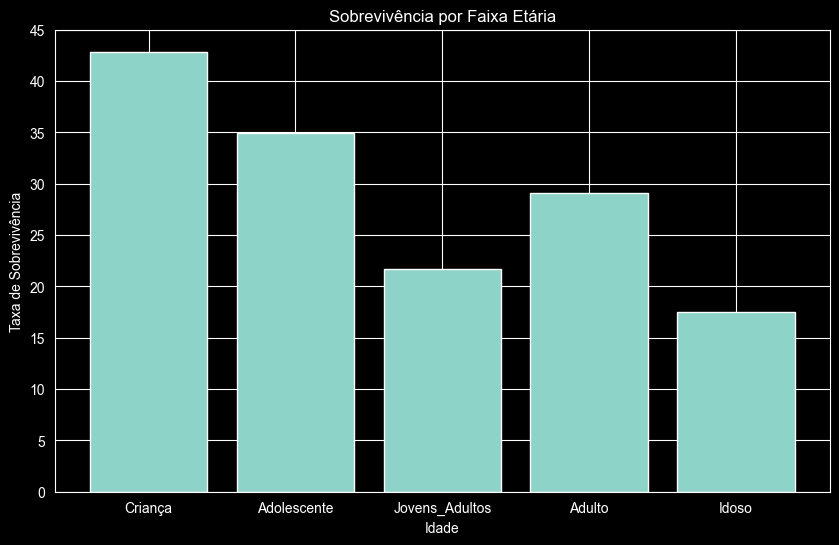

In [33]:
# Calcular a taxa de sobrevivência por faixa etária
cruzamento_idade = titanic.groupby('Faixa_Etaria')['Survived'].mean()*100

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(cruzamento_idade.index, cruzamento_idade.values)

ax.set_title('Sobrevivência por Faixa Etária')
ax.set_xlabel('Idade')
ax.set_ylabel('Taxa de Sobrevivência')

plt.show()


In [34]:
#RESPOSTA: Apesar do maior número de passageiros ser o de jovens adultos e adultos, os índices de sobrevivência não acompanham o número de passageiros, o que mostra a chance de sobrevivência das crianças é realmente maior.
#Apesar disso, seria esperado que as crianças tivessem uma taxa de sobrevivência ainda maior, pela sua prioridade de acesso aos botes.


## 3. O preço da passagem (Fare) tem correlação com a sobrevivência?

In [35]:
titanic.groupby('Survived')['Fare'].mean()
#Já vemos que em média, quem sobreviveu pagou mais caro

Survived
0    27.935586
1    48.395408
Name: Fare, dtype: float64

C:\Users\Danie\AppData\Local\Temp\ipykernel_70700\4042884805.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_por_fare = titanic.groupby('Faixa_Preço')['Survived'].mean()


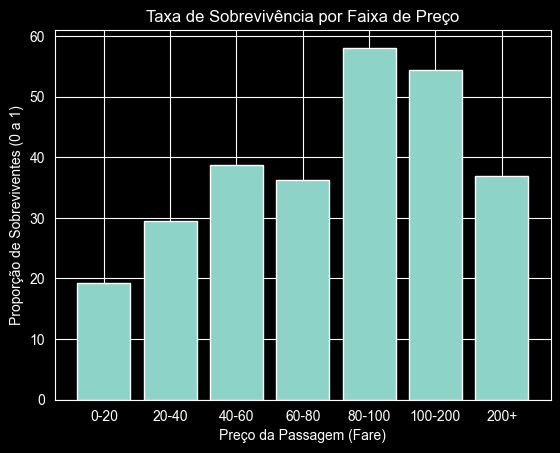

In [36]:
#  Criar faixas de preço (ex: de 20 em 20 dólares)
bins = [0, 20, 40, 60, 80, 100, 200, 550]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-200', '200+']
titanic['Faixa_Preço'] = pd.cut(titanic['Fare'], bins=bins, labels=labels)

# Calcular a taxa de sobrevivência por faixa
taxa_por_fare = titanic.groupby('Faixa_Preço')['Survived'].mean()

# Gráfico de barras da TAXA
plt.bar(taxa_por_fare.index, taxa_por_fare.values*100)

plt.title('Taxa de Sobrevivência por Faixa de Preço')
plt.xlabel('Preço da Passagem (Fare)')
plt.ylabel('Proporção de Sobreviventes (0 a 1)')

plt.show()

In [37]:
#RESPOSTA: Em média, quem pagou mais na passagem, teve mais chance de sobreviver.


## 4. Viajar sozinho era mais perigoso do que viajar em família?

In [38]:
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,Mulheres_e_Crianças,Faixa_Etaria,Faixa_Preço
0,1,22.0,7.2500,Masculino,1,0,3,2.0,0,Homem Adulto,Jovens_Adultos,0-20
1,2,38.0,71.2833,Feminino,1,0,1,0.0,1,Mulher Adulta,Adulto,60-80
2,3,26.0,7.9250,Feminino,0,0,3,2.0,1,Mulher Adulta,Jovens_Adultos,0-20
3,4,35.0,53.1000,Feminino,1,0,1,2.0,1,Mulher Adulta,Adulto,40-60
4,5,35.0,8.0500,Masculino,0,0,3,2.0,0,Homem Adulto,Adulto,0-20


In [39]:
# Criar coluna 'Sozinho': 1 para sim, 0 para não
titanic['Sozinho'] = (titanic['sibsp'] + titanic['Parch'] == 0).astype(int)

# Calcular a taxa de sobrevivência
analise_familia = titanic.groupby('Sozinho')['Survived'].mean()

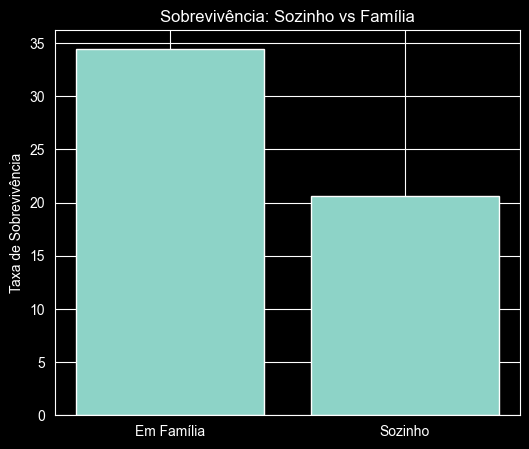

In [40]:
fig, ax = plt.subplots(figsize = (6,5))
plt.bar(['Em Família', 'Sozinho'], [analise_familia[0]*100, analise_familia[1]*100])

ax.set_title('Sobrevivência: Sozinho vs Família')
ax.set_ylabel('Taxa de Sobrevivência')

plt.show()

In [41]:
#RESPOSTA: A chance de sobreviver sozinho é menor. Família que fica unida, sobrevive unida.

## 5. Qual a relação entre a classe da passagem e a sobrevivência?

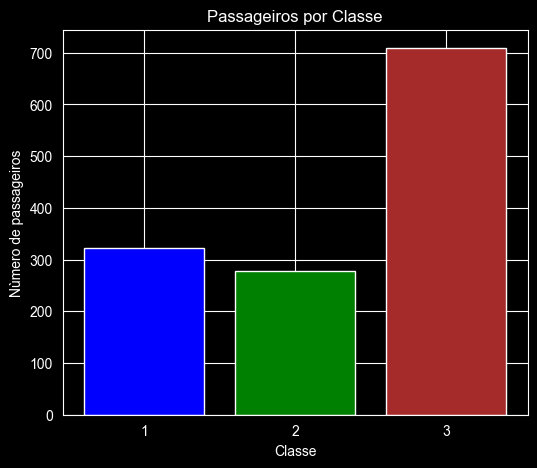

In [42]:
passageiros_classe = titanic['Pclass'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(6, 5))

cores = ['blue', 'green', 'brown']
plt.bar(passageiros_classe.index.astype(str), passageiros_classe.values, color=cores)

# 3. Rótulos básicos
plt.title('Passageiros por Classe')
plt.xlabel('Classe')
plt.ylabel('Nùmero de passageiros')

plt.show()

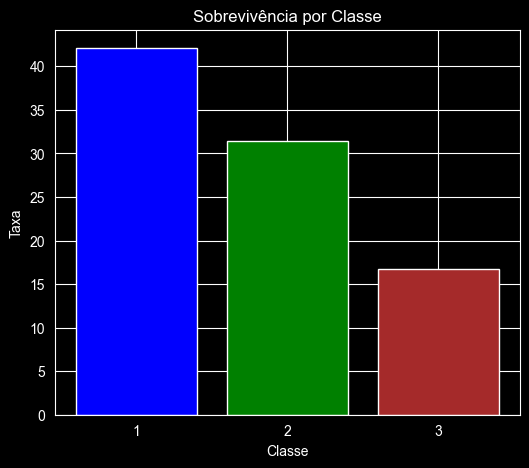

In [43]:
#Calcular taxa de sobreviventes por classe
taxa_classe = titanic.groupby('Pclass')['Survived'].mean()*100

fig, ax = plt.subplots(figsize = (6,5))

cores = ['blue', 'green', 'brown']
plt.bar(taxa_classe.index.astype(str), taxa_classe.values, color = cores)

# 3. Rótulos básicos
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa')

plt.show()


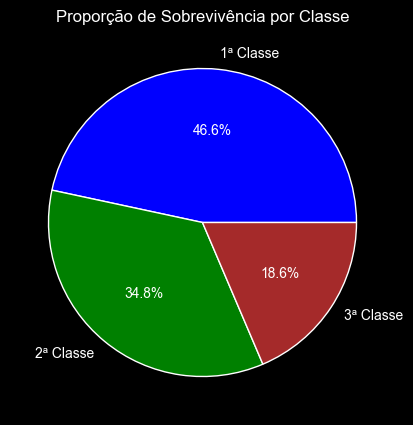

In [44]:
fig, ax = plt.subplots(figsize = (6,5))
plt.pie(taxa_classe, labels=['1ª Classe', '2ª Classe', '3ª Classe'], autopct='%1.1f%%', colors = cores)
plt.title('Proporção de Sobrevivência por Classe')

plt.show()

In [45]:
#RESPOSTA: A maioria dos passageiros eram da classe 3, mas representam a menor parte dos sobreviventes
# Já a classe 1, compõe a maior parte dos sobreviventes, apesar de ter menos de 50% da quantidade de passageiros da classe 3.

# Parte 3: Avaliar as distribuições de probabilidade das variáveis que considera mais interessante;


## Calculando sobrevivência aleatória

- Tomando um grupo aleatório de X pessoas, qual a probabilidade de pelo menos 1 pessoa desse grupo sobreviver ao evento naufrágio?




In [46]:
#Definir taxa de sobrevivência geral
chance_sobrevivencia = titanic['Survived'].mean()
chance_sobrevivencia

np.float64(0.2612681436210848)

In [47]:
#Calculando o cenário de um grupo aleatório de 10 pessoas
import scipy.stats as st
N = 10 #(número de pessoas no grupo)
K = 0 #(cenário de 0 sobreviventes)
P = chance_sobrevivencia # (taxa de sobrevivência geral)
fp = st.binom(n = N, p = P)
resultado =  1 - fp.pmf(K) # excetuando 0 sobreviventes, pelo menos um sobreviverá
print(f'Em um grupo de {N} pessoas, {resultado:.2%} de probabilidade de pelo menos 1 pessoa sobreviver.')

Em um grupo de 10 pessoas, 95.16% de probabilidade de pelo menos 1 pessoa sobreviver.


In [49]:
P = chance_sobrevivencia

#contador
for N in range(1, 11):
    fp = st.binom(n = N, p = P)
    resultado = 1 - fp.pmf(0)
    print(f'Em um grupo de {N} pessoas, há {resultado:.2%} de probabilidade de pelo menos 1 pessoa sobreviver.')

Em um grupo de 1 pessoas, há 26.13% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 2 pessoas, há 45.43% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 3 pessoas, há 59.69% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 4 pessoas, há 70.22% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 5 pessoas, há 78.00% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 6 pessoas, há 83.75% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 7 pessoas, há 87.99% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 8 pessoas, há 91.13% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 9 pessoas, há 93.45% de probabilidade de pelo menos 1 pessoa sobreviver.
Em um grupo de 10 pessoas, há 95.16% de probabilidade de pelo menos 1 pessoa sobreviver.


## Calculando chance de sobrevivência por classe e idade
- Qual a chance de uma (ou duas) mulher(es) entre 10 e 25 da PRIMEIRA CLASSE sobreviver(em)?





In [50]:
grupo = titanic[(titanic['Sex'] == 'Feminino') & (titanic['Pclass'] == 3) & (titanic['Age'].between(10, 25))]

P = grupo['Survived'].mean() #chance individual de sobrevivência
N = 2 #pessoas no grupo
K = 2 #sobreviventes

fp = st.binom(N, P)
probabilidade_2_sobreviverem = fp.pmf(K)

print(f"Probabilidade individual (p): {P:.2%}")
print(f"Chance de EXATAMENTE as 2 sobreviverem: {probabilidade_2_sobreviverem:.2%}")

Probabilidade individual (p): 31.88%
Chance de EXATAMENTE as 2 sobreviverem: 10.17%


- Qual a chance de uma (ou duas) mulher(es) entre 30 e 40 anos da TERCEIRA CLASSE sobreviver(em)?


In [51]:
grupo = titanic[(titanic['Sex'] == 'Feminino') & (titanic['Pclass'] == 3) & (titanic['Age'].between(30, 40))]

P = grupo['Survived'].mean() #chance individual de sobrevivência
N = 2 #pessoas no grupo
K = 2 #sobreviventes

fp = st.binom(N, P)
probabilidade_2_sobreviverem = fp.pmf(K)

print(f"Probabilidade individual (p): {P:.2%}")
print(f"Chance de EXATAMENTE as 2 sobreviverem: {probabilidade_2_sobreviverem:.2%}")

Probabilidade individual (p): 25.93%
Chance de EXATAMENTE as 2 sobreviverem: 6.72%


- Qual a chance de um (ou dois) homem(ns) entre 40 e 50 anos da PRIMEIRA CLASSE sobreviver(em)?


In [52]:
grupo = titanic[(titanic['Sex'] == 'Masculino') & (titanic['Pclass'] == 1) & (titanic['Age'].between(40, 50))]

P = grupo['Survived'].mean() #chance individual de sobrevivência
N = 2 #pessoas no grupo
K = 2 #sobreviventes

fp = st.binom(N, P)
probabilidade_2_sobreviverem = fp.pmf(K)

print(f"Probabilidade individual (p): {P:.2%}")
print(f"Chance de EXATAMENTE os 2 sobreviverem: {probabilidade_2_sobreviverem:.2%}")

Probabilidade individual (p): 22.22%
Chance de EXATAMENTE os 2 sobreviverem: 4.94%


- Qual a chance de um (ou dois) homem(ns) entre 20 e 30 anos da TERCEIRA CLASSE sobreviver(em)?


In [53]:
grupo = titanic[(titanic['Sex'] == 'Masculino') & (titanic['Pclass'] == 3) & (titanic['Age'].between(20, 30))]

P = grupo['Survived'].mean() #chance individual de sobrevivência
N = 2 #pessoas no grupo
K = 2 #sobreviventes

fp = st.binom(N, P)
probabilidade_2_sobreviverem = fp.pmf(K)

print(f"Probabilidade individual (p): {P:.2%}")
print(f"Chance de EXATAMENTE os 2 sobreviverem: {probabilidade_2_sobreviverem:.2%}")

Probabilidade individual (p): 8.55%
Chance de EXATAMENTE os 2 sobreviverem: 0.73%


In [53]:
#FIM